In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import nltk
import string
from collections import Counter
import re

In [3]:
df = pd.read_csv('Noble_Laureates.csv')

In [4]:
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [5]:
df.shape

(969, 18)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 20 columns):
Year                    969 non-null int64
Category                969 non-null object
Prize                   969 non-null object
Motivation              969 non-null object
Prize Share             969 non-null object
Laureate ID             969 non-null int64
Laureate Type           969 non-null object
Full Name               969 non-null object
Birth Date              940 non-null object
Birth City              941 non-null object
Birth Country           943 non-null object
Sex                     943 non-null object
Organization Name       722 non-null object
Organization City       716 non-null object
Organization Country    716 non-null object
Death Date              617 non-null object
Death City              599 non-null object
Death Country           605 non-null object
Birth Year              940 non-null float64
Age                     940 non-null float64
dtypes: float64

In [7]:
#number od NaNs coulmn-wise
df.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation               88
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
dtype: int64

In [8]:
year_prize = df['Year'].value_counts()
type(year_prize)

pandas.core.series.Series

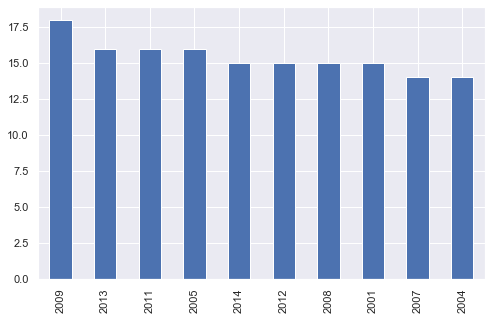

In [9]:
#Top 10 years of highest number of noble prizes
year_prize[:10].plot(kind='bar',figsize=(8,5));

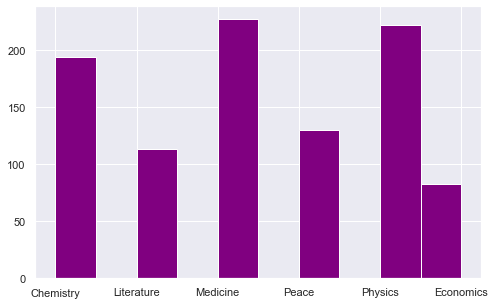

In [41]:
#No. of Noble prizes awarded categorywise
plt.figure(figsize=(8,5))
plt.hist(df['Category'],color='purple');

Male      893
Female     50
Name: Sex, dtype: int64


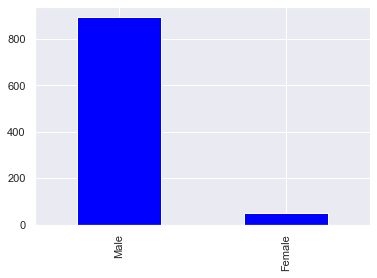

In [67]:
#No. of Noble prizes recieved by gender
gender_awards = df['Sex'].value_counts()
print(gender_awards)
gender_awards.plot(kind='bar',color='blue');

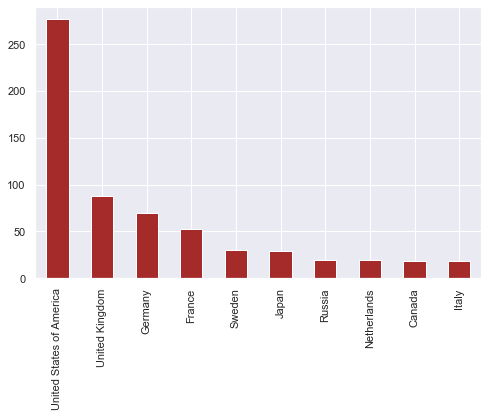

In [39]:
#Plot top 10 countries that got the most noble prizes
country_award = df['Birth Country'].value_counts()
country_award[:10].plot(kind='bar',figsize=(8,5),color='brown');

In [13]:
df['Birth Year'] = df['Birth Date'].replace(to_replace='NaN',value=0)
df['Birth Year'] = df['Birth Date'].str[0:4]
df['Birth Year'] = df['Birth Year'].apply(pd.to_numeric)
df['Age'] = df['Year'] - df['Birth Year']

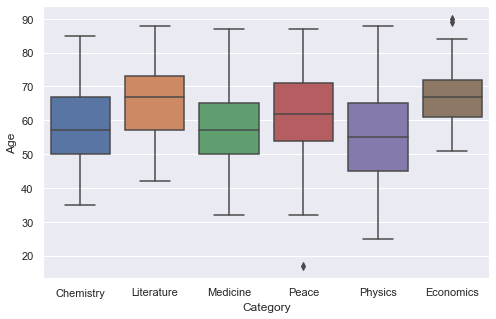

In [14]:
fig,ax = plt.subplots(figsize=(8,5))
sns.boxplot(data=df,x='Category',y='Age',ax=ax);

The average age of people who got the Noble prizes are around 55 and above.<br>
The above graph shows there are outliers in the categories of "Peace" and "Economics".

In [74]:
#Lets find the ages and other details of the outliers
#First, youngest Laureate
youngest_age = int(df['Age'].min())
youngest_laureate = df.loc[df['Age']==youngest_age]
youngest_laureate[['Year','Category','Full Name','Prize','Birth City','Birth Country']]

,Year,Category,Full Name,Prize,Birth City,Birth Country
940,2014,Peace,Malala Yousafzai,The Nobel Peace Prize 2014,Mingora,Pakistan


In [73]:
#Oldest of all
old_age = int(df['Age'].max())
oldest_laureate = df.loc[df['Age']==old_age]
oldest_laureate[['Year','Category','Full Name','Prize','Birth City','Birth Country']]
#old_age

,Year,Category,Full Name,Prize,Birth City,Birth Country
825,2007,Economics,Leonid Hurwicz,The Sveriges Riksbank Prize in Economic Scienc...,Moscow,Russia


In [72]:
#First women to get Noble prize
year = df[df['Sex']=="Female"].nsmallest(1,'Year')
year[['Year','Category','Full Name','Prize','Birth City','Birth Country']]

,Year,Category,Full Name,Prize,Birth City,Birth Country
19,1903,Physics,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903,Warsaw,Russian Empire (Poland)


In [16]:
df['Motivation'] = df['Motivation'].fillna(value="motivationempty")

In [17]:
df.isnull().sum()

Year                      0
Category                  0
Prize                     0
Motivation                0
Prize Share               0
Laureate ID               0
Laureate Type             0
Full Name                 0
Birth Date               29
Birth City               28
Birth Country            26
Sex                      26
Organization Name       247
Organization City       253
Organization Country    253
Death Date              352
Death City              370
Death Country           364
Birth Year               29
Age                      29
dtype: int64

In [18]:
#Extract all the text data from the 'Motivation' column
i=0
txt = []
for i in range(df.shape[0]):
    remove_first_word = ' '.join(df['Motivation'][i].split()[1:])
    txt.append(remove_first_word.strip('"'))

words_string = str(txt).strip('[]')
print(words_string)
words = nltk.word_tokenize(words_string)
#print(words)


'recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions', 'special recognition of his poetic composition, which gives evidence of lofty idealism, artistic perfection and a rare combination of the qualities of both heart and intellect', 'his work on serum therapy, especially its application against diphtheria, by which he has opened a new road in the domain of medical science and thereby placed in the hands of the physician a victorious weapon against illness and deaths', '', '', 'recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him', 'recognition of the extraordinary services he has rendered by his work on sugar and purine syntheses', 'greatest living master of the art of historical writing, with special reference to his monumental work, <I>A history of Rome</I>', 'his work on malaria, by which he has shown how it enters the or

In [19]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation) + list(["'their","'his","'the","``"])

In [21]:
filtered_words = [word for word in words if not word in useless_words]

In [22]:
filtered_words

["'recognition",
 'extraordinary',
 'services',
 'rendered',
 'discovery',
 'laws',
 'chemical',
 'dynamics',
 'osmotic',
 'pressure',
 'solutions',
 "'special",
 'recognition',
 'poetic',
 'composition',
 'gives',
 'evidence',
 'lofty',
 'idealism',
 'artistic',
 'perfection',
 'rare',
 'combination',
 'qualities',
 'heart',
 'intellect',
 'work',
 'serum',
 'therapy',
 'especially',
 'application',
 'diphtheria',
 'opened',
 'new',
 'road',
 'domain',
 'medical',
 'science',
 'thereby',
 'placed',
 'hands',
 'physician',
 'victorious',
 'weapon',
 'illness',
 'deaths',
 "'recognition",
 'extraordinary',
 'services',
 'rendered',
 'discovery',
 'remarkable',
 'rays',
 'subsequently',
 'named',
 "'recognition",
 'extraordinary',
 'services',
 'rendered',
 'work',
 'sugar',
 'purine',
 'syntheses',
 "'greatest",
 'living',
 'master',
 'art',
 'historical',
 'writing',
 'special',
 'reference',
 'monumental',
 'work',
 'I',
 'A',
 'history',
 'Rome',
 '/I',
 'work',
 'malaria',
 'shown',

In [23]:
word_counter = Counter(filtered_words)

In [24]:
all_words = word_counter.most_common()

In [33]:
most_common_words = word_counter.most_common()[:30]

In [34]:
list_of_tuples = most_common_words

In [35]:
zip(*list_of_tuples)

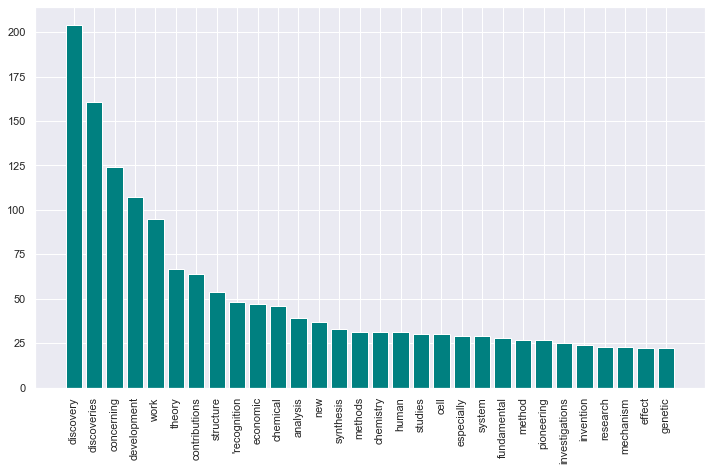

In [38]:
plt.figure(figsize=(12,7))
plt.bar(*zip(*list_of_tuples),color='teal')
plt.xticks(rotation=90);

Of all the words in the motivations the most frequently used words are discovery/discoveries. This implies that most of the Noble prizes are awarded for people who made discoveries in their respective fields. When we look for invention in the list, it hardly repeated. The frequency of "invention" is around 25 while the frequency of the word "discovery" is above 200. <br>
Discovery is the basis for invention.

<b>Compare Noble prizes for discoveries vs inventions

In [125]:
#First extract discovery/invention from the "Motivation" words and assign values to a new column
df.loc[(df['Motivation'].str.contains("discovery")) | (df['Motivation'].str.contains("discoveries")), 'Disc_Inv'] = 'Discovery'  
df.loc[(df['Motivation'].str.contains("invention")), 'Disc_Inv'] = 'Invention' 

In [126]:
df.head(4)

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,...,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Birth Year,Age,Disc_Inv
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1852.0,49.0,Discovery
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,1839.0,62.0,NaN
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,1854.0,47.0,NaN
3,1901,Peace,The Nobel Peace Prize 1901,motivationempty,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,1828.0,73.0,NaN


Discovery    361
Invention     28
Name: Disc_Inv, dtype: int64


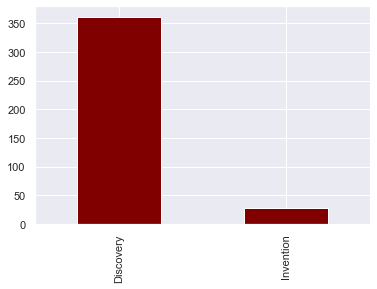

In [142]:
discovery_count = df['Disc_Inv'].value_counts()
print(discovery_count)
discovery_count.plot(kind='bar',color='maroon');